In [1]:
from tensorflow import keras 
import tensorflow as tf

In [2]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [25]:
model.compile(loss=keras.losses.mean_squared_error,optimizer=keras.optimizers.SGD(lr=0.09))

In [7]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 44us/sample - loss: 1.1734 - val_loss: 0.6142
Epoch 2/20
11610/11610 [==============================] - 0s 29us/sample - loss: 1.0169 - val_loss: 0.4910
Epoch 3/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5000 - val_loss: 0.5532
Epoch 4/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4741 - val_loss: 5.0205
Epoch 5/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.8088 - val_loss: 0.4188
Epoch 6/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4226 - val_loss: 0.5326
Epoch 7/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4165 - val_loss: 0.3818
Epoch 8/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4006 - val_loss: 0.3683
Epoch 9/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3961 - val_l

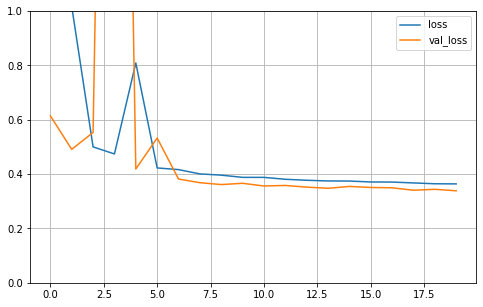

In [8]:
#Learning Curves

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [9]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances y_pred = model.predict(X_new)

5160/5160 [==============================] - 0s 13us/sample - loss: 0.3704


Tensorboard for visualization

In [10]:
import os
root_logdir = os.path.join(os.curdir,"my_logs")

In [11]:
def get_run_logdir():
    
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

In [26]:
run_logdir = get_run_logdir()

In [27]:
run_logdir

'./my_logs/run_2020_06_26-15_15_19'

In [28]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3490 - val_loss: 0.3151
Epoch 2/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3395 - val_loss: 0.3063
Epoch 3/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3329 - val_loss: 0.3108
Epoch 4/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3402 - val_loss: 0.3144
Epoch 5/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3304 - val_loss: 0.3313
Epoch 6/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3374 - val_loss: 0.3344
Epoch 7/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3355 - val_loss: 0.3159
Epoch 8/30
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3585 - val_loss: 0.3234
Epoch 9/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3388 - val_l

In [31]:
import numpy as np

In [32]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir) 
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data 
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images 
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)] 
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step) 
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1]) 
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

Hyperparameter tuning:

The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [34]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential() 
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

We need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. This will enable us to use 'GridSearchCV' or 'RandomizedSearchCV'

In [36]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)

In [37]:
keras_reg.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 44us/sample - loss: 1.4267 - val_loss: 0.5438
Epoch 2/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.6048 - val_loss: 0.4872
Epoch 3/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5193 - val_loss: 0.4617
Epoch 4/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5000 - val_loss: 0.4510
Epoch 5/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4898 - val_loss: 0.4440
Epoch 6/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4831 - val_loss: 0.4394
Epoch 7/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4776 - val_loss: 0.4367
Epoch 8/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4731 - val_loss: 0.4307
Epoch 9/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.468

11610/11610 [==============================] - 0s 29us/sample - loss: 0.3669 - val_loss: 0.3422
Epoch 76/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3664 - val_loss: 0.3412
Epoch 77/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3652 - val_loss: 0.3387
Epoch 78/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3646 - val_loss: 0.3395
Epoch 79/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3641 - val_loss: 0.3385
Epoch 80/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3633 - val_loss: 0.3412
Epoch 81/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3631 - val_loss: 0.3374
Epoch 82/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3626 - val_loss: 0.3406
Epoch 83/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3622 - val_loss: 0.3372
Epoch 84/100
11610/11610 [======

In [38]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 48us/sample - loss: 1.3093 - val_loss: 5.3642
Epoch 2/100
7740/7740 [==============================] - 0s 25us/sample - loss: 13.4434 - val_loss: 306.5475
Epoch 3/100
7740/7740 [==============================] - 0s 25us/sample - loss: 593.9643 - val_loss: 17888.1649
Epoch 4/100
7740/7740 [==============================] - 0s 26us/sample - loss: 33435.0429 - val_loss: 1432616.9055
Epoch 5/100
7740/7740 [==============================] - 0s 28us/sample - loss: 3353608.7897 - val_loss: 83324148.0803
Epoch 6/100
7740/7740 [==============================] - 0s 29us/sample - loss: 252948585.9195 - val_loss: 4882520758.7287
Epoch 7/100
7740/7740 [==============================] - 0s 27us/sample - loss: 9906833654.4992 - val_loss: 288179644207.3633
Epoch 8/100
7740/7740 [==============================] - 0s 27us/sample - loss: 902387196987.7994 - val_loss: 16943141098837.3340
Epoch 9/100

7740/7740 [==============================] - 0s 28us/sample - loss: 5.3449 - val_loss: 29.6316
Epoch 4/100
7740/7740 [==============================] - 0s 27us/sample - loss: 44.6308 - val_loss: 262.0410
Epoch 5/100
7740/7740 [==============================] - 0s 27us/sample - loss: 840.8791 - val_loss: 2404.7154
Epoch 6/100
7740/7740 [==============================] - 0s 26us/sample - loss: 7701.9490 - val_loss: 22135.9253
Epoch 7/100
7740/7740 [==============================] - 0s 26us/sample - loss: 69932.8427 - val_loss: 203810.7375
Epoch 8/100
7740/7740 [==============================] - 0s 25us/sample - loss: 331142.7685 - val_loss: 1879141.4240
Epoch 9/100
7740/7740 [==============================] - 0s 26us/sample - loss: 3021434.4179 - val_loss: 17359284.7837
Epoch 10/100
7740/7740 [==============================] - 0s 32us/sample - loss: 28567162.1807 - val_loss: 159511730.0034
Epoch 11/100
3870/3870 [==============================] - 0s 12us/sample - loss: 26922828.0974
Trai

Epoch 67/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.3302 - val_loss: 0.3198
Epoch 68/100
7740/7740 [==============================] - 0s 29us/sample - loss: 0.3292 - val_loss: 0.3214
Epoch 69/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.3259 - val_loss: 0.3178
Epoch 70/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.3282 - val_loss: 0.3277
Epoch 71/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.3242 - val_loss: 0.3349
Epoch 72/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.3287 - val_loss: 0.3068
Epoch 73/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.3242 - val_loss: 0.3250
Epoch 74/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.3298 - val_loss: 0.3113
Epoch 75/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.3264 - val_loss: 0.3217
Epoch 76/100
7740/7740 [=============

7740/7740 [==============================] - 0s 31us/sample - loss: 0.3361 - val_loss: 0.3158
Epoch 46/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.3337 - val_loss: 0.3505
Epoch 47/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.3336 - val_loss: 0.3064
Epoch 48/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.3321 - val_loss: 0.3106
Epoch 49/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.3315 - val_loss: 0.3245
Epoch 50/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.3326 - val_loss: 0.3092
Epoch 51/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.3306 - val_loss: 0.3180
Epoch 52/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.3316 - val_loss: 0.3122
Epoch 53/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.3284 - val_loss: 0.3363
Epoch 54/100
7740/7740 [==========================

KeyboardInterrupt: 